<h1><center>Data Analytics</h1>
<h2><center>Homework 1</h2>
<h3><center>Name: 李權桓   &emsp;   ID:10546004</h3>

### q1
Let $p=\frac{1}{4}$ as students  correctly answer multiple-choice questions.
So, 
$$
P(X=4)+P(X=5)=\begin{pmatrix}  
5 \\
4
\end{pmatrix}
p^{4}(1-p)^1 + 
\begin{pmatrix}  
5 \\
5
\end{pmatrix}
p^{5}(1-p)^0 $$

In [87]:
#q1 
p = .25
5*p**4*(1-p) + p**5

0.015625

### q2
Both side win and lose is $p=.5$. 
One team finish this game need to win at least 4 matches which means $n \in \lbrace 4,5,6,7 \rbrace$. 
If one needs to win 4 games, which means probability is $p^4$ in order to get champion, each game is independent.
If one needs to win 5 games, which means probability is $\begin{pmatrix} 3 \\ 1 \end{pmatrix} p^3q^1 p$ It needs to multiply $p$ because last game need to win by one team.
Once we know 5 games, the 6 and 7 games same fashion. Howevery this only for one team, we need to multiply to 2 teams in order to get expected values. 
$$ 
(
4p^4 +
5\begin{pmatrix} 4 \\ 1 \end{pmatrix} p^4q^1 +
6\begin{pmatrix} 5 \\ 2 \end{pmatrix} p^4q^2 +
7\begin{pmatrix} 6 \\ 3 \end{pmatrix} p^4q^3 
) \cdot 2 = 5.8125
$$ 


In [88]:
# q2
p = .5
q = 1-p
2*( 4* p**4 + 5*4*p**4*q + 6*5*2*p**4*q**2 + 7*5*4*p**4*q**3 )

5.8125

### q3
The fountain show starts every 80 mins and I can wait 20 mins for the show. So, the time will be uniform distribution.
The probability is,
$$P=\frac{20}{80}=\frac{1}{4}$$

### q4a
Mary enters at 8h10 and John still there means clerk 1 have been processing John's work at least 10 mins
$$P(x>10) = 1 - (1- e^ {-10 \mu_1} ) = e^ {-10 \mu_1} $$

### q4b
According to Memoryless property, John finish time doesn't take history into account. Only present matters. So,
\begin{aligned}
P(x_1 > x_2) 
&= \int^\infty_0 P\lbrace x_1 > x_2 | x_1 =x \rbrace \lambda_1 e^{-\lambda_1 x} \\
&= \int^\infty_0 P\lbrace x > x_2 \rbrace \lambda_1 e^{-\lambda_1 x} \\
&= \int^\infty_0 (1- e^{-\lambda_2 x}) \lambda_1 e^{-\lambda_1 x} \\
&= 1- \frac{\lambda_1}{\lambda_1 + \lambda_2} \\
&= \frac{\mu_2}{\mu_1+\mu_2}
\end{aligned}

### q5
The train delay 1st row of matrix is delay min and 2 row is probability,
$$
\begin{vmatrix}
4 & 6 & 8 & 10 & 12 \\
\frac{1}{16} & \frac{1}{8} & \frac{1}{2} & \frac{1}{4} & \frac{1}{16}
\end{vmatrix}
$$

The bus delay is Normal Distribution which means the delay probability should take train delay as influence factor. 
It will need to consider if bus arrive earier than train probability and bus arrive after 8h20. 
$$Probability * (Probability \; of \; bus \; arrive \; before \; train + Probability \; of \; bus \; arrive \; after \; 8h20)$$
 
Note: $Probability \; of \; bus \; arrive \; after \; 8h20) = .5$ becasue is Normal distribution $\mu$


In [89]:
### q5
from scipy.stats import norm
(norm.cdf(14 , 20 , 2) + .5 ) * 1/16 + (norm.cdf(16 , 20 , 2) + .5 ) * 1/8 + \
    (norm.cdf(18 , 20 , 2) + .5 ) * 1/2 + (norm.cdf(20 , 20 , 2) + .5 ) * 1/4+  1/16


0.7385057620862279

### q6
The Probability of cancer $P(C)=\frac{1}{100}$, the probability dectect positive given somebody have cancer $P(D|C)=\frac{99}{100}$
According to Bayes' Theorem,
$$
\begin{aligned}
P(C|D) &= \frac{P(C \cap D)}{P(D)}
&= \frac{P(D|C)P(C)}{P(D|C)P(C) + P(D|C^\prime)P(C^\prime)}
\end{aligned}
$$


In [90]:
# q6a

pc=.01
pdc=.99
(pdc*pc)/(pdc*pc+(1-pdc)*(1-pc))

0.4999999999999997

In [91]:
# q6b

pc=.01
pdc=.999
(pdc*pc)/(pdc*pc+(1-pdc)*(1-pc))

0.9098360655737704

### q7
CLT:
$$
Z = \frac{\bar{x} - \mu }{ \frac{\sigma}{\sqrt{n} } }
$$

a) less than 10 mins: $Z = \frac{10 - 8.5 }{ \frac{3.5}{\sqrt{49} } }$

In [92]:
# q7a
import numpy as np
from scipy.stats import norm
mu = 8.5
sigma = 3.5
n=49
z = (10- mu)/ (sigma /np.sqrt(n))
norm.cdf(z)

0.9986501019683699

In [93]:
# q7b

z1 = (10- mu)/ (sigma /np.sqrt(n))
z2 = (7- mu)/ (sigma /np.sqrt(n))
norm.cdf(z1) - norm.cdf(z2)

0.9973002039367398

In [94]:
#q7c

z = (7.5- mu)/ (sigma /np.sqrt(n))
norm.cdf(z)

0.022750131948179195

### q8
The test statistic value:
$$
Z = \frac{\hat{p} - p_0 }{ \sqrt{\frac{p (1-p)}{n} } }
$$

In [95]:
# q8
import numpy as np
from scipy.stats import norm
p = .4
n= 600
r1 = 216
r2 = 264
z1 = (r1/n- p)/ (np.sqrt(p*(1-p)/n))
z2 = (r2/n- p)/ (np.sqrt(p*(1-p)/n))
norm.cdf(z2) - norm.cdf(z1)

0.9544997361036416

### q9

In [96]:
 # q9
from scipy.stats import binom
import pandas as pd

obs = pd.Series([39 , 23, 12, 1])
n = 24
ss = 75

xbar = (obs[0]*0 + obs[1]*1 + obs[2]*2 + obs[3]*3)/ss
phat = xbar/n

exp = pd.Series()
for i in range(0,4):
    exp.at[i] = ss * binom.pmf(i , n , phat)
print(exp) 

print(phat)

0    38.144709
1    26.156372
2     8.594237
3     1.800697
dtype: float64
0.027777777777777776


/tmp/ipykernel_26361/425235944.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  exp = pd.Series()


In [97]:
chi = 0
for i in range(0,4):
    tmp = (obs[i]-exp[i])**2 / exp[i]
    print('when i is ', i , 'tmp = ', tmp)
    chi = chi + tmp 
print(chi)

when i is  0 tmp =  0.019177553372751635
when i is  1 tmp =  0.3808893949356095
when i is  2 tmp =  1.3496515570903822
when i is  3 tmp =  0.3560376400292312
2.1057561454279745


In [98]:
from scipy.stats import chi2
val = chi2.ppf(.95,2)
print('Q9: The test statistic value=', val)
if chi < val:
     print( 'Do not reject H_0')
else:
    print('Reject H_0')

Q9: The test statistic value= 5.991464547107979
Do not reject H_0


### q10

In [99]:
# q10
import numpy as np
a = np.array([[24, 11, 10], [7, 13, 5], [4, 6, 20]]) # observers
obs = a.reshape((3,3))
a_prob = a/100
r_sum = a_prob.sum(axis=1)
c_sum = a_prob.sum(axis=0)

r_mat = r_sum.repeat(3,axis=0).reshape((3,3))
c_mat = c_sum.repeat(3,axis=0).reshape((3,3)).T # do transpose
exp = r_mat * c_mat *100 # expeted matrix
exp

array([[15.75, 13.5 , 15.75],
       [ 8.75,  7.5 ,  8.75],
       [10.5 ,  9.  , 10.5 ]])

In [100]:
chi = 0
for i in range(c_mat.shape[0]):
    for j in range(c_mat.shape[1]):
        tmp = (obs[i][j] - exp[i][j])**2 / exp[i][j]
        chi = chi + tmp
chi

26.493121693121697

In [101]:

from scipy.stats import chi2
val = chi2.ppf(.99,4)
print('Q10: The test statistic value=', val)
if chi < val:
     print( 'Do not reject H_0')
else:
    print('Reject H_0')

Q10: The test statistic value= 13.276704135987622
Reject H_0


### q11

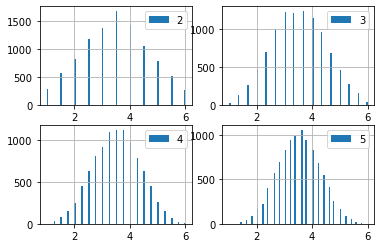

In [102]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dices = np.array([2,3,4,5])
data = []

# this might something wrong
for i in dices:
    result = []
    for j in range(10000):
        tmp = random.choices(range(1,7),k = i)
        tmp = np.array(tmp).sum()/i # average
        result.append(tmp)
    data.append(result)


fig, ax = plt.subplots(2, 2)

for i in range(dices.size):
    plt.subplot(2,2,i+1)
    pd.Series(data[i]).hist(bins=100)
    mylabel = "{}".format(dices[i])
    plt.legend(mylabel)

### Q12

In [103]:
# q12
import random
import pandas as pd


def card_steps(data, x): # x is start position
    steps = 0
    tmp = []
    while x < data.__len__():
        tmp.append(x)
        steps = data[x]
        x = x + steps
    return tmp



In [104]:
# q12a
# verify the start steps
steps = [x for x in range(1,11)]  # specific picks from starts
n = 10000
result = pd.DataFrame()

for i in range(n):
    output = []
    num_list = [5 if y == 11 or y== 12 or y== 13 else y for y in range(1,14)]
    a = num_list*4 
    data1 = random.sample(a,52)
    for x in steps:
        output.append( card_steps(data1, x)[-1])
    # print(i, output)
    df = pd.DataFrame({i:output})
    result = pd.concat([result,df],axis = 1).reset_index(drop=True)
    #df = pd.DataFrame(output , columns=[i])
    #result.insert(i,i, output) # warring messege show poor performace
    #print('When the start steps is', x , ', the position and frequency are \n ', df.groupby('a').size()/n)
result.transpose().head() # show first 5 rows


,0,1,2,3,4,5,6,7,8,9
0,49,49,51,51,51,51,49,51,51,51
1,48,50,48,48,48,50,50,48,50,50
2,48,48,48,50,50,48,48,48,50,48
3,46,46,46,46,46,46,46,46,46,46
4,47,47,47,47,48,47,47,48,47,48


The max prob in same position is  1.0
The min prob in same position is  0.4
The frequency is 
 1.0    5615
0.6    1017
0.8     971
0.7     957
0.9     840
0.5     556
0.4      44
dtype: int64


<AxesSubplot:>

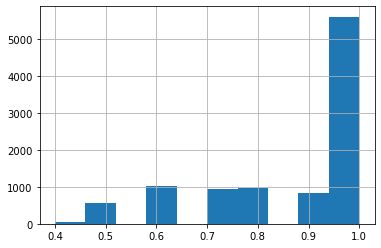

In [105]:
prob_max = []
for i in range(n):
    prob_max.append(max(result.groupby(i).size())/10)
print('The max prob in same position is ', max(prob_max))
print('The min prob in same position is ', min(prob_max))
print('The frequency is \n', pd.DataFrame(prob_max).value_counts())
pd.Series(prob_max).hist()

## q12a Results
1. No matter change the steps, most of time will end in same position in every run.
2. If we want to check 10000 runs and find the frequency of position will stop in  the experiments as below:

In [106]:
for i in range(10):
    val = result.transpose().groupby(i).size()/n
    print('When the start steps is', i+1 , ', the position and frequency are \n ', val)
#result

When the start steps is 1 , the position and frequency are 
  0
42    0.0151
43    0.0282
44    0.0437
45    0.0561
46    0.0706
47    0.1360
48    0.1417
49    0.1517
50    0.1730
51    0.1839
dtype: float64
When the start steps is 2 , the position and frequency are 
  1
42    0.0145
43    0.0278
44    0.0450
45    0.0582
46    0.0704
47    0.1373
48    0.1429
49    0.1513
50    0.1679
51    0.1847
dtype: float64
When the start steps is 3 , the position and frequency are 
  2
42    0.0148
43    0.0296
44    0.0439
45    0.0564
46    0.0688
47    0.1359
48    0.1451
49    0.1497
50    0.1695
51    0.1863
dtype: float64
When the start steps is 4 , the position and frequency are 
  3
42    0.0154
43    0.0294
44    0.0436
45    0.0564
46    0.0680
47    0.1367
48    0.1447
49    0.1511
50    0.1736
51    0.1811
dtype: float64
When the start steps is 5 , the position and frequency are 
  4
42    0.0146
43    0.0265
44    0.0442
45    0.0555
46    0.0688
47    0.1373
48    0.1442
49    0.1

In [107]:
# rewrite for function
import pandas as pd

def main_fun(face_setps=5 , num_card = 52, n=10000):
    
    steps = [x for x in range(1,11)]  # specific picks from starts
    result = pd.DataFrame()
    for i in range(n):
        output = []
        num_list = [face_setps if y == 11 or y== 12 or y== 13 else y for y in range(1,14)]
        val = (4*num_card/52 )
        a = num_list* int(val)
        data1 = random.sample(a,num_card)
        for x in steps:
            output.append( card_steps(data1, x)[-1])
        df = pd.DataFrame({i:output})
        result = pd.concat([result,df],axis = 1).reset_index(drop=True)
    return result

The max prob in same position is  1.0
The min prob in same position is  0.5
The frequency is 
 1.0    9364
0.6     150
0.7     150
0.8     137
0.9     125
0.5      74
dtype: int64


<AxesSubplot:>

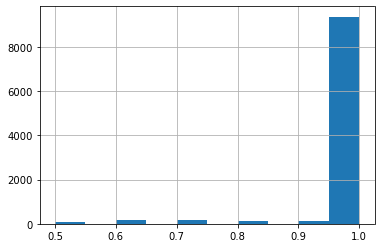

In [108]:
result = main_fun(num_card=104)

prob_max = []
for i in range(n):
    prob_max.append(max(result.groupby(i).size())/10)
print('The max prob in same position is ', max(prob_max))
print('The min prob in same position is ', min(prob_max))
print('The frequency is \n', pd.DataFrame(prob_max).value_counts())
pd.Series(prob_max).hist()

## Playing 104 Cards Results
1. Comparing to 52 cards, the 104 cards game will almost twice chance to win the game( final cards stop in the same positions).
2. It also improve the worst case probability.

In [109]:
face_steps = [1,3,5,7,9]
for x in face_steps:
    print('The steps of face card = ', x)
    result = main_fun(face_setps=x)
    prob_max = []
    for i in range(n):
        prob_max.append(max(result.groupby(i).size())/10)
    print('The max prob in same position is ', max(prob_max))
    print('The min prob in same position is ', min(prob_max))
    print('The frequency is \n', pd.DataFrame(prob_max).value_counts())

The steps of face card =  1
The max prob in same position is  1.0
The min prob in same position is  0.4
The frequency is 
 1.0    8152
0.9     494
0.8     402
0.7     393
0.6     363
0.5     195
0.4       1
dtype: int64
The steps of face card =  3
The max prob in same position is  1.0
The min prob in same position is  0.4
The frequency is 
 1.0    6990
0.6     710
0.8     667
0.9     635
0.7     613
0.5     375
0.4      10
dtype: int64
The steps of face card =  5
The max prob in same position is  1.0
The min prob in same position is  0.4
The frequency is 
 1.0    5588
0.6    1002
0.7     967
0.8     958
0.9     844
0.5     594
0.4      47
dtype: int64
The steps of face card =  7
The max prob in same position is  1.0
The min prob in same position is  0.3
The frequency is 
 1.0    4301
0.6    1314
0.7    1254
0.8    1201
0.9    1062
0.5     761
0.4     106
0.3       1
dtype: int64
The steps of face card =  9
The max prob in same position is  1.0
The min prob in same position is  0.3
The 

## Change steps of face card results in 52 cards:
It's easy to say, the smaller steps of face cards, the higher probability will win.

In [110]:

face_steps = [1,3,5,7,9]
for x in face_steps:
    print('The steps of face card = ', x)
    result = main_fun(face_setps=x, num_card=104)
    prob_max = []
    for i in range(n):
        prob_max.append(max(result.groupby(i).size())/10)
    print('The max prob in same position is ', max(prob_max))
    print('The min prob in same position is ', min(prob_max))
    print('The frequency is \n', pd.DataFrame(prob_max).value_counts())

The steps of face card =  1
The max prob in same position is  1.0
The min prob in same position is  0.5
The frequency is 
 1.0    9917
0.9      23
0.8      21
0.7      18
0.6      15
0.5       6
dtype: int64
The steps of face card =  3
The max prob in same position is  1.0
The min prob in same position is  0.5
The frequency is 
 1.0    9694
0.9      75
0.6      72
0.8      64
0.7      54
0.5      41
dtype: int64
The steps of face card =  5
The max prob in same position is  1.0
The min prob in same position is  0.5
The frequency is 
 1.0    9398
0.6     144
0.8     141
0.7     136
0.9     125
0.5      56
dtype: int64
The steps of face card =  7
The max prob in same position is  1.0
The min prob in same position is  0.5
The frequency is 
 1.0    8822
0.8     290
0.7     259
0.6     253
0.9     236
0.5     140
dtype: int64
The steps of face card =  9
The max prob in same position is  1.0
The min prob in same position is  0.4
The frequency is 
 1.0    8128
0.7     433
0.8     415
0.9     4

## Change steps of face card results in 104 cards:
1. It is more promissing outcome as we compare 52 cards results. Most of time will have 100% probability end in the same cards.
2. The smaller face steps, the higher probability is.
3. The more cards we play, the higher probability we win.